# An Initial Look at the Data

### Exploring the Story and Structure of the Dataset

In [2]:
# This code uses the seaborn library to load a dataset named 'planets', and then displays the first few rows of the dataset to provide an initial overview of its contents.
import seaborn as sns

planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
# Note : What is the story of the dataset, the first question to be asked about the data?
# Note : The second thing we need to do is to make a copy of the dataset.
df = planets.copy()

In [5]:
# Structural information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
# The code imports the pandas library as 'pd' and then converts the 'method' column in the DataFrame 'df' into a categorical data type using the pd.Categorical() function.
import pandas as pd 
df.method = pd.Categorical(df.method)

df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

### Description of the Data Set

In [8]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
# The code "<df.describe().T>" in a Jupyter Notebook or similar context means transposing the summary statistics generated by the describe() function for a DataFrame (df),
# providing a concise overview of numerical data characteristics in a tabular format.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
# The code "< df.describe(include = 'all').T >" is used to generate a comprehensive summary of statistical information, including descriptive statistics and unique counts, 
# for all columns in a DataFrame, regardless of their data types, in a Jupyter Notebook or similar environments.
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


### Analysis of Missing Values

In [11]:
planets = sns.load_dataset("planets")
df = planets.copy()
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
# Is there a missing value ?
df.isnull().values.any()

True

In [13]:
# Which variable is present in how many pieces?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [15]:
# This code snippet "<df["orbital_period"].fillna(0, inplace=True)>" means that it is filling any missing (NaN) values in the "orbital_period" column of the DataFrame (df)
# with the value 0, and the changes are applied directly to the DataFrame (inplace).
df["orbital_period"].fillna(0, inplace = True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [17]:
# Replacing missing values under the mass variable with the mean value.
df["mass"].fillna(df.orbital_period.mean(), inplace = True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [20]:
# Replacing all missing values in the dataset with the mean value.
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [21]:
# We are starting everything from scratch because we have messed up the dataset.
df = planets.copy()
df.head()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

### Distribution Plots
### Barplot
### Dataset Story

* price : price in dollars
* carat : weight
* cut : quality
* color : color
* clarity : clarity
* x : length
* y : width
* z : depth
* depth : total depth percentage
* table : width of top of diamond relative to widest point

In [22]:
# It imports the Seaborn data visualization library as 'sns', loads the "diamonds" dataset using the sns.load_dataset() function, makes a copy of the dataset called 'df', 
# and displays the first few rows of the DataFrame using the df.head() method.
import seaborn as sns 

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
# It imports the seaborn library as sns, which is used for data visualization. Then, it calculates the count of unique values in the "cut" column of the DataFrame df using the 
# value_counts() method. This method returns a Series containing the counts of each unique value in the "cut" column, effectively showing the distribution of diamond cuts in the dataset.
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [27]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [28]:
# ordinal categorization
from pandas.api.types import CategoricalDtype 

In [ ]:
from pandas.api.types import CategoricalDtype 

In [29]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [30]:
# The code imports the seaborn library as 'sns', then converts the 'cut' column in the DataFrame 'df' to a categorical data type with ordering enabled using the 'CategoricalDtype' function, and finally displays the data types of the DataFrame columns using the 'dtypes' attribute.
df.cut =  df.cut.astype(CategoricalDtype(ordered = True))
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

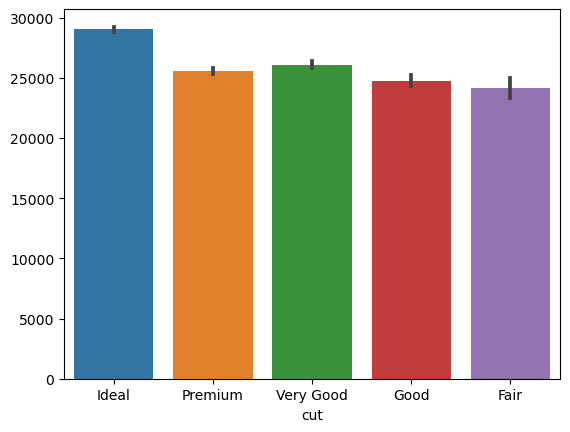

In [31]:
# This code uses the Seaborn library to create a bar plot. It plots the "cut" values on the x-axis and the index of the DataFrame "df.cut" on the y-axis, using data from the DataFrame "df". The semicolon at the end suppresses unnecessary output, and the resulting bar plot visualizes the distribution of the "cut" values.
sns.barplot(x = "cut", y = df.cut.index, data = df);

### Scatterplots

In [32]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


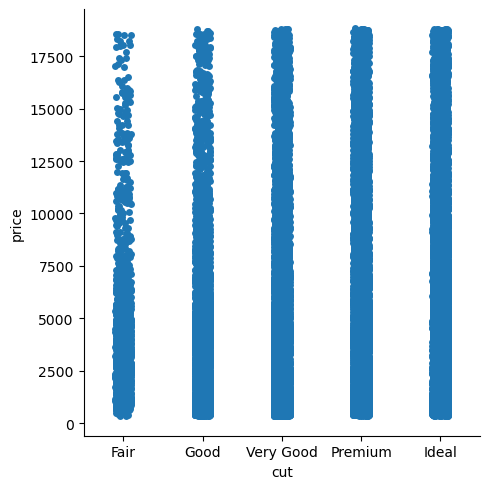

In [33]:
# This code uses the Seaborn library to create a categorical plot (catplot) where the x-axis represents the "cut" of diamonds and the y-axis represents the "price" of diamonds, 
# using the data from the DataFrame df.
sns.catplot(x = "cut", y = "price", data = df);

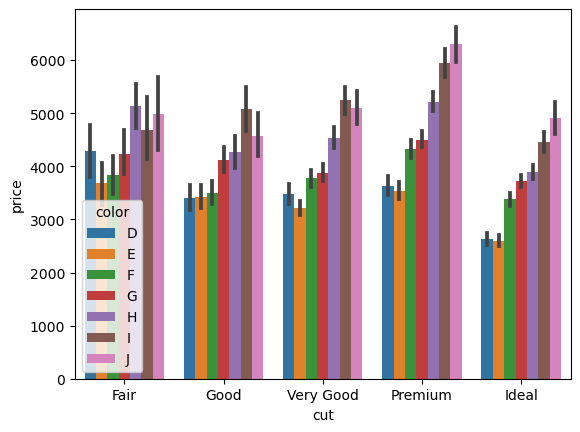

In [34]:
# This line of code uses Seaborn to create a bar plot where the x-axis represents the "cut" of diamonds, the y-axis represents the "price" of diamonds, 
# and the bars are grouped and color-coded by the "color" of diamonds using data from the DataFrame df.
sns.barplot(x = "cut", y = "price", hue = "color", data=df);

In [35]:
# To validate the above graph,
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Boxplot

### Dataset Story

* total_bill: total cost of the meal (including tip and tax)
* tip: tip amount
* sex: gender of the person paying the bill (0=male, 1=female)
* smoker: is there anyone smoking in the group? (0=no, 1=yes)
* day: day of the week (3=Thursday, 4=Friday, 5=Saturday)
* time: when (0=day, 1=night)
* size: how many people are in the group?

In [36]:
# Basics
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [38]:
# This code snippet calculates the frequency of each unique value in the "sex" column of the DataFrame df. It returns a count of occurrences for each unique value, 
# effectively showing the distribution of genders in the dataset.
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [39]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [40]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [41]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

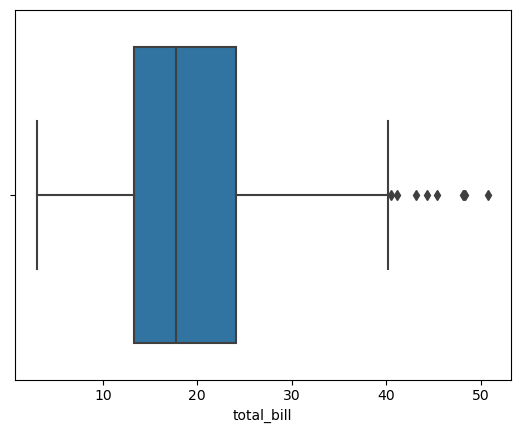

In [42]:
# This code line creates a box plot using Seaborn where the x-axis represents the "total_bill" column from the DataFrame "df".
sns.boxplot(x = df["total_bill"]);

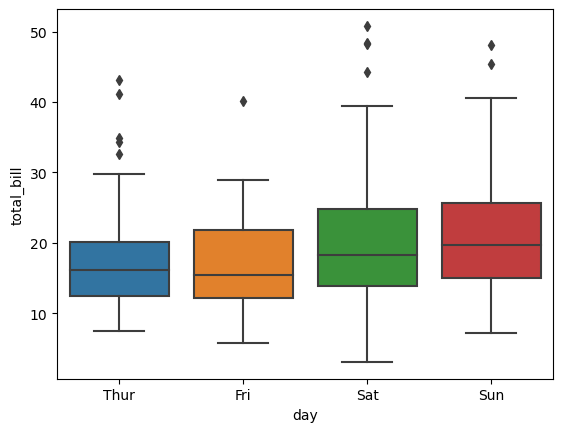

In [43]:
# Which days do we earn more ?
sns.boxplot(x = "day", y = "total_bill", data=df);

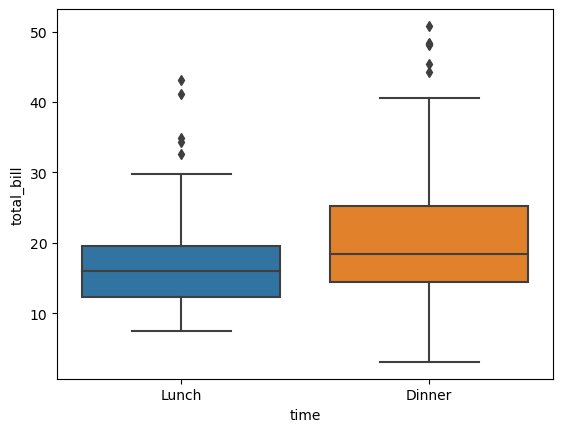

In [44]:
# Are we earning more in the morning or in the evening ?
sns.boxplot(x = "time", y = "total_bill", data=df);

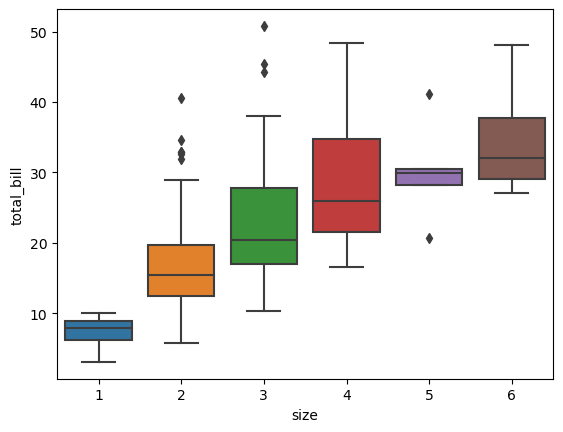

In [46]:
# Is the number of people proportional to the earnings?
sns.boxplot(x = "size", y = "total_bill", data=df);

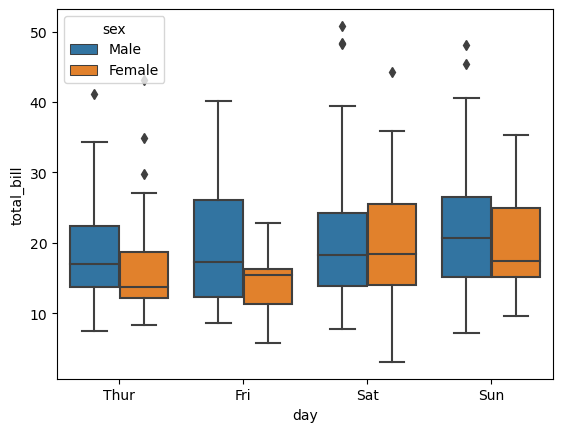

In [48]:
# Which days have which sex paid for the meal?
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data=df);

### Scatterplot

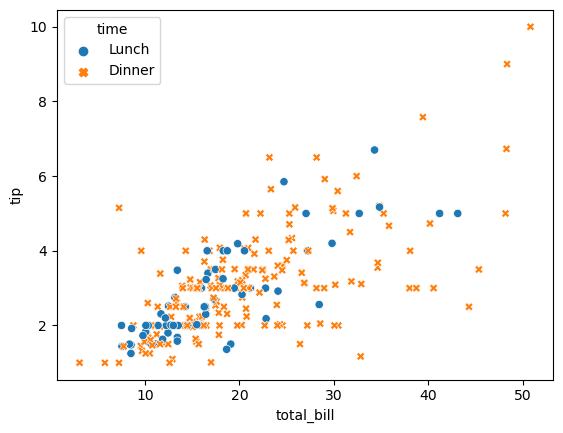

In [50]:
# This code generates a box plot using Seaborn (sns) to visualize the distribution of total_bill amounts (y) across different day categories, with the additional distinction 
# of sex (hue) in the dataset df
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

### The Demonstration of a Linear Relationship.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

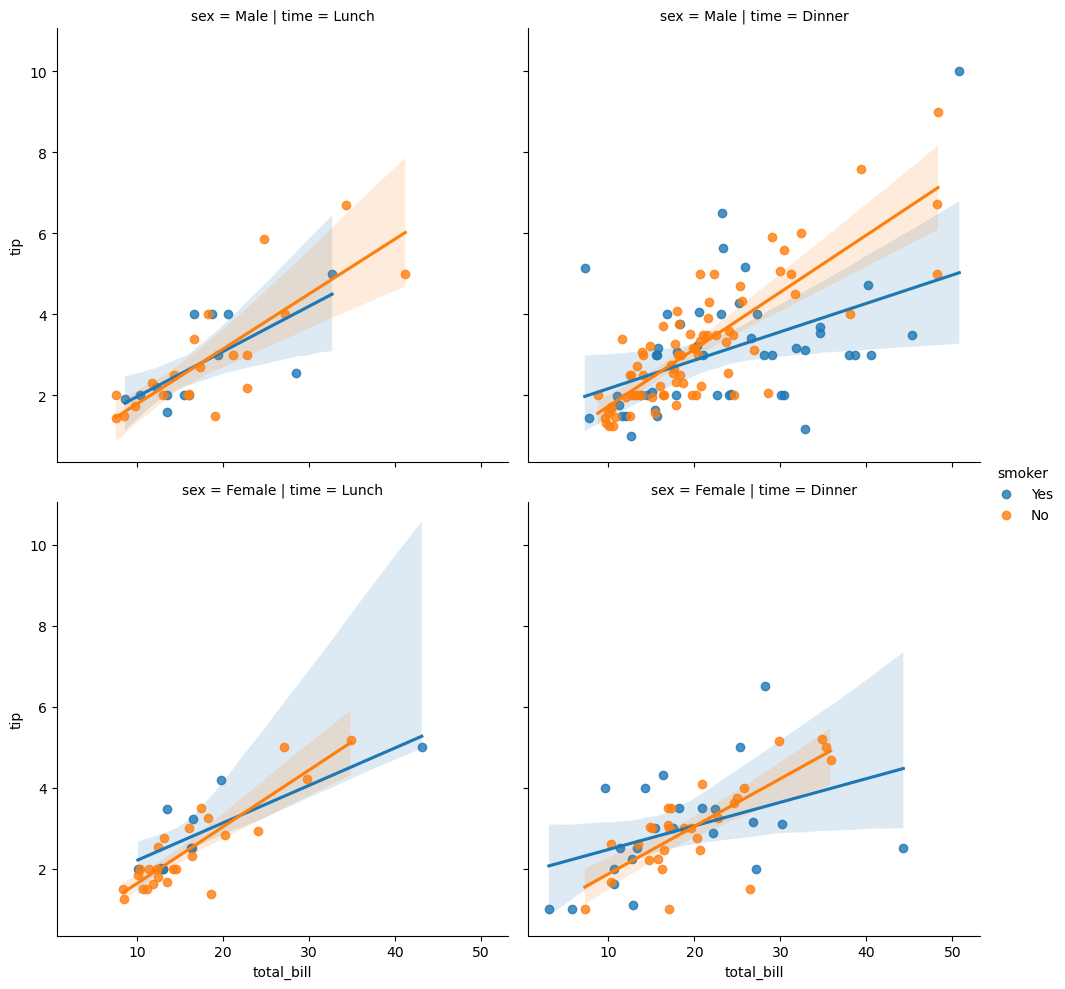

In [53]:
# Visualize the linear relationship with Seaborn's lmplot function using the variables: x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", 
# and the data from the DataFrame df.
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

### Scatterplot Matrix

In [54]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


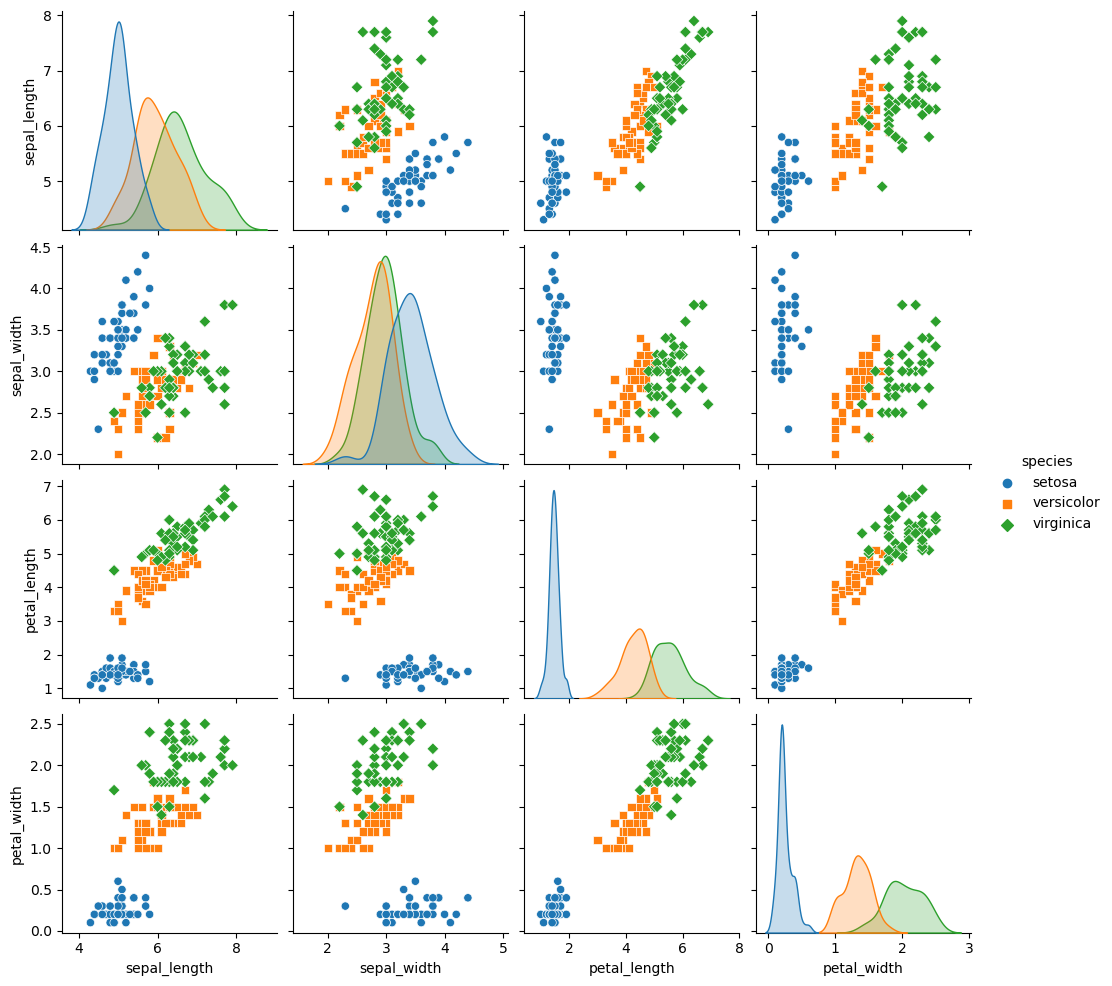

In [56]:
# This code generates a pair plot using Seaborn library, displaying relationships between variables in the DataFrame df, 
# with different marker shapes and colored by the "species" column.
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

### Simple Time Series Plot

In [59]:
# This code "<pip install yfinance>" is used to install the "yfinance" Python package using the pip package manager.
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [60]:
import yfinance as yf
import datetime

start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2019, 8, 25)

# Pulling data
df = yf.download("AAPL", start=start_date, end=end_date)
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  24.009066  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.407412  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.949341  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.980770  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.097002  283192000


In [61]:
# This code snippet assigns the "Close" column of the DataFrame (df) to a variable named "kapanis" and then displays the first few rows of this column using the head() function.
kapanis = df["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

In [63]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [66]:
kapanis.index = pd.DatetimeIndex(kapanis.index)
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

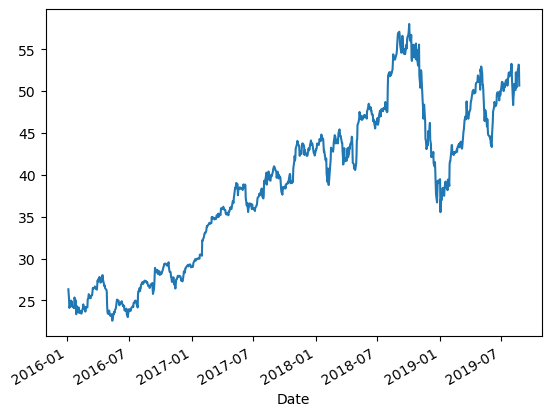

In [67]:
kapanis.plot();